In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

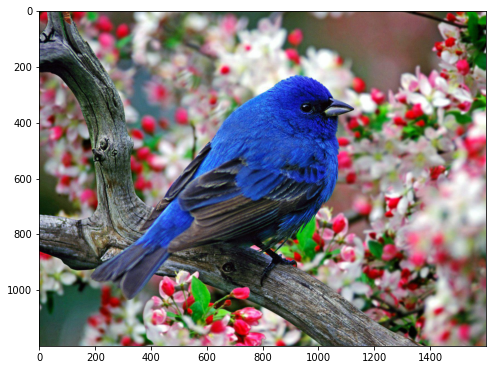

In [ ]:
#DISPLAY OF THE IMAGE

img = np.array(Image.open("/content/wall.jpg"))
plt.figure(figsize=(8,8))
plt.imshow(img)

In [ ]:
print('# of dims: ',img.ndim)     # dimension of an image
print('Img shape: ',img.shape)    # shape of an image
print('Dtype: ',img.dtype)
print(img[20, 20])                # pixel value at [R, G, B]
print(img[:, :, 1].max())         # min pixel value at channel G

# of dims:  3
Img shape:  (1200, 1600, 3)
Dtype:  uint8
[192   9  29]
255


In [ ]:
#SAVING THE IMAGE


path = "/content/wall.jpg"
pil_img = Image.fromarray(img)
pil_img.save(path)#Rotating an Image

Text(0.5, 1.0, 'rotated')

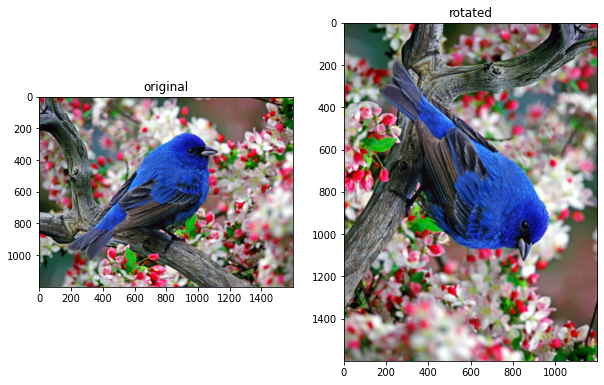

In [ ]:
#CLOCK WISE ROTATION

degrees = 90
img = np.array(Image.open("/content/wall.jpg"))
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title("original")
img0 = img.copy()
for i in range(degrees // 90):
    img0 = img0.transpose(1, 0, 2)
    for j in range(0, img0.shape[1] // 2):
        c = img0[:, j, :].copy()
        img0[:, j, :] = img0[: , img0.shape[1]-j-1, :]
        img0[: , img0.shape[1]-j-1, :] = c
fig.add_subplot(1, 2, 2)
plt.imshow(img0)
plt.title("rotated")

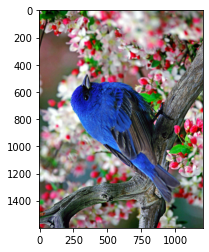

In [ ]:
#ANTI CLOCK ROTATION

plt.imshow(np.rot90(img))

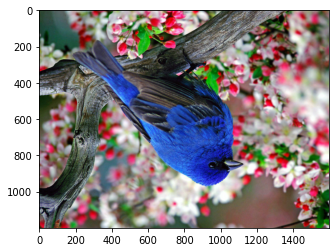

In [ ]:
#Flipping an image
img0 = img.copy()
for i in range(img0.shape[0] // 2):
  c = img0[i, :, :].copy()
  img0[i, :, :] = img0[img0.shape[0] - i - 1, :, :]
  img0[img0.shape[0] - i - 1, :, :] = c
plt.imshow(img0)

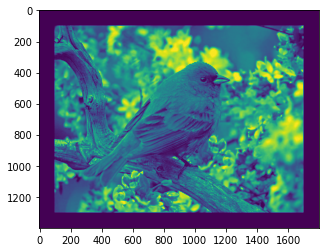

In [ ]:
#PADDING THE BLACK SPACES

img = np.array(Image.open("/content/wall.jpg"))
img_grey = img.sum(2) / (255*3)
img0 = img_grey.copy()
img0 = np.pad(img0, ((100,100),(100,100)), mode='constant')
plt.imshow(img0)

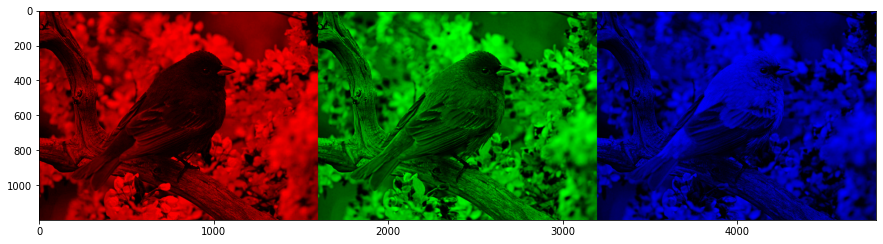

In [ ]:
#VISUALIZING RGB CHANNELS

img = np.array(Image.open("/content/wall.jpg"))
img_R, img_G, img_B = img.copy(), img.copy(), img.copy()
img_R[:, :, (1, 2)] = 0
img_G[:, :, (0, 2)] = 0
img_B[:, :, (0, 1)] = 0
img_rgb = np.concatenate((img_R,img_G,img_B), axis=1)
plt.figure(figsize=(15, 15))
plt.imshow(img_rgb)

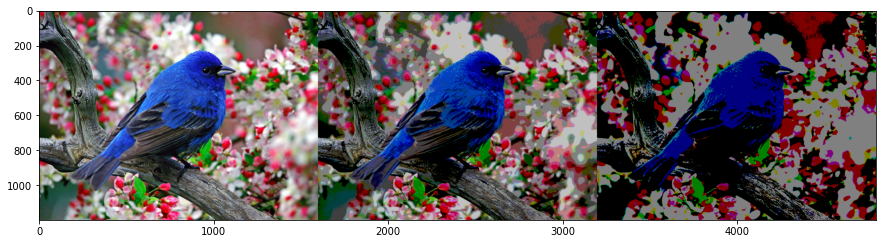

In [ ]:
#COLOR REDUCTION

img = np.array(Image.open("/content/wall.jpg"))
# Making Pixel values discrete by first division by // which gives int and then multiply by the same factor
img_0 = (img // 64) * 64
img_1 = (img // 128) * 128
img_all = np.concatenate((img, img_0, img_1), axis=1)
plt.figure(figsize=(15, 15))
plt.imshow(img_all)

Text(0.5, 1.0, 'Trimmed')

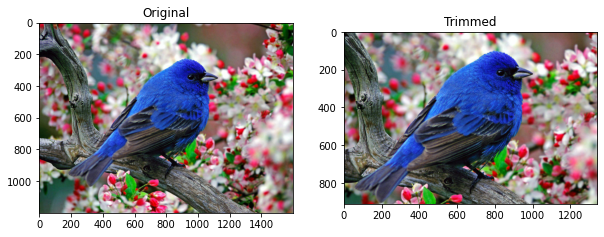

In [ ]:
#TRIM IMAGE

img = np.array(Image.open("/content/wall.jpg"))
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')
img0 = img[130:-160, 128:-128, :]
fig.add_subplot(1, 2, 2)
plt.imshow(img0)
plt.title('Trimmed')

Text(0.5, 1.0, 'Pasted with slice')

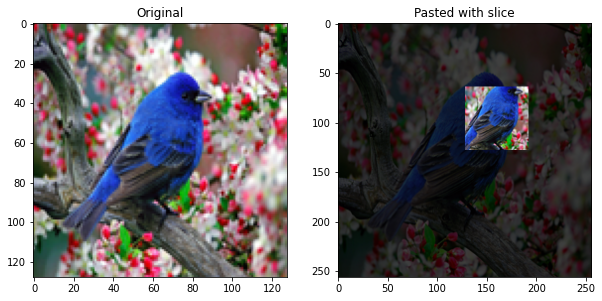

In [ ]:
#pasting with slice

src = np.array(Image.open("/content/wall.jpg").resize((128, 128)))
dst = np.array(Image.open("/content/wall.jpg").resize((256, 256))) // 4
dst_copy = dst.copy()
dst_copy[64:128, 128:192] = src[32:96, 32:96]
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(src)
plt.title('Original')
fig.add_subplot(1, 2, 2)
plt.imshow(dst_copy)
plt.title('Pasted with slice')

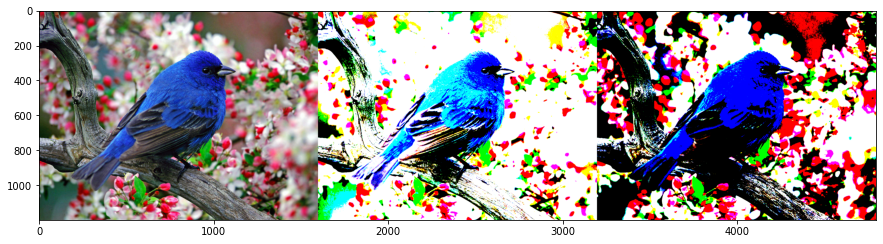

In [ ]:
#BINARIZE IMAGE

img = np.array(Image.open("/content/wall.jpg"))
img_64 = (img > 64) * 255
img_128 = (img > 128) * 255
fig = plt.figure(figsize=(15, 15))
img_all = np.concatenate((img, img_64, img_128), axis=1)
plt.imshow(img_all)

uint8


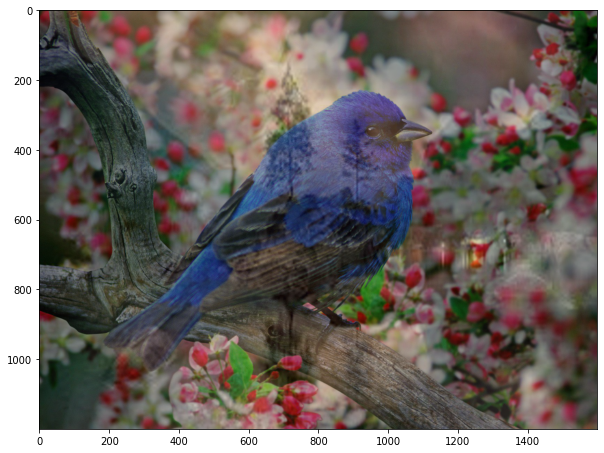

In [ ]:
#Blending 2 images
img = np.array(Image.open('/content/wall.jpg'))
img0 = np.array(Image.open('/content/back.jpeg').resize(img.shape[1::-1])) # resize takes 2 arguments (WIDTH, HEIGHT)
print(img.dtype)
# uint8
dst = (img * 0.5 + img0 * 0.4).astype(np.uint8)   # Blending them in
plt.figure(figsize=(10, 10))
plt.imshow(dst)

Text(0.5, 1.0, 'Negative of RGB image')

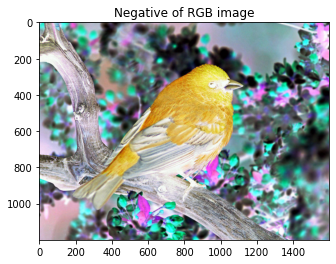

In [ ]:
#Negative
img = 255 - img
plt.imshow(img)
plt.title('Negative of RGB image')

Text(0.5, 1.0, 'Primary of RGB image')

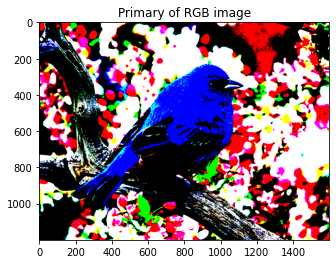

In [ ]:
#primary
img = np.array(Image.open('/content/wall.jpg'))
pixels=img

width, height,a = img.shape
# Create new Image and a Pixel Map
for i in range(width):
    for j in range(height):
      # Get Pixel
      pixel = img[i][j]

      # Get R, G, B values (This are int from 0 to 255)
      red =   pixel[0]
      green = pixel[1]
      blue =  pixel[2]

      # Transform to primary
      if red > 127:
        red = 255
      else:
        red = 0
      if green > 127:
        green = 255
      else:
        green = 0
      if blue > 127:
        blue = 255
      else:
        blue = 0
      # Set Pixel in new image
      pixels[i, j] = (red, green, blue) 

plt.imshow(pixels)
plt.title('Primary of RGB image')
